<a href="https://colab.research.google.com/github/VioletKimble/DecisionScience/blob/main/Soccer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io

from google.colab import files

uploaded = files.upload()

Saving futbol.csv to futbol.csv


In [2]:
#importing the data
df = pd.read_csv(io.BytesIO(uploaded['futbol.csv']))
data = "futbol.csv"

In [8]:
# looks at the top 5 values in the dataframe
df.head()

,name,age,practice,height,scored
0,julia,16,0.0,1.68,1.0
1,cata,16,2.0,1.66,2.0
2,camila,16,0.0,1.68,1.5
3,maria,17,6.0,1.53,2.0
4,joana,15,0.0,1.63,1.0



Data and Exploratory Analysis

In [9]:
df.shape


(13, 5)

In [10]:
# check to see if any n/a in dataframe
df.isnull().sum()

name        0
age         0
practice    0
height      0
scored      0
dtype: int64



```
# This is formatted as code
```

Variables

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      13 non-null     object 
 1   age       13 non-null     int64  
 2   practice  13 non-null     float64
 3   height    13 non-null     float64
 4   scored    13 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 648.0+ bytes


Univariate analysis

In [12]:
df.describe()

,age,practice,height,scored
count,13.000000,13.000000,13.000000,13.000000
mean,16.076923,2.192308,1.668462,1.769231
std,0.640513,2.940652,0.066439,0.725011
min,15.000000,0.000000,1.530000,0.500000
25%,16.000000,0.000000,1.630000,1.000000
50%,16.000000,0.500000,1.680000,2.000000
75%,16.000000,3.000000,1.710000,2.000000
max,17.000000,8.000000,1.750000,3.000000


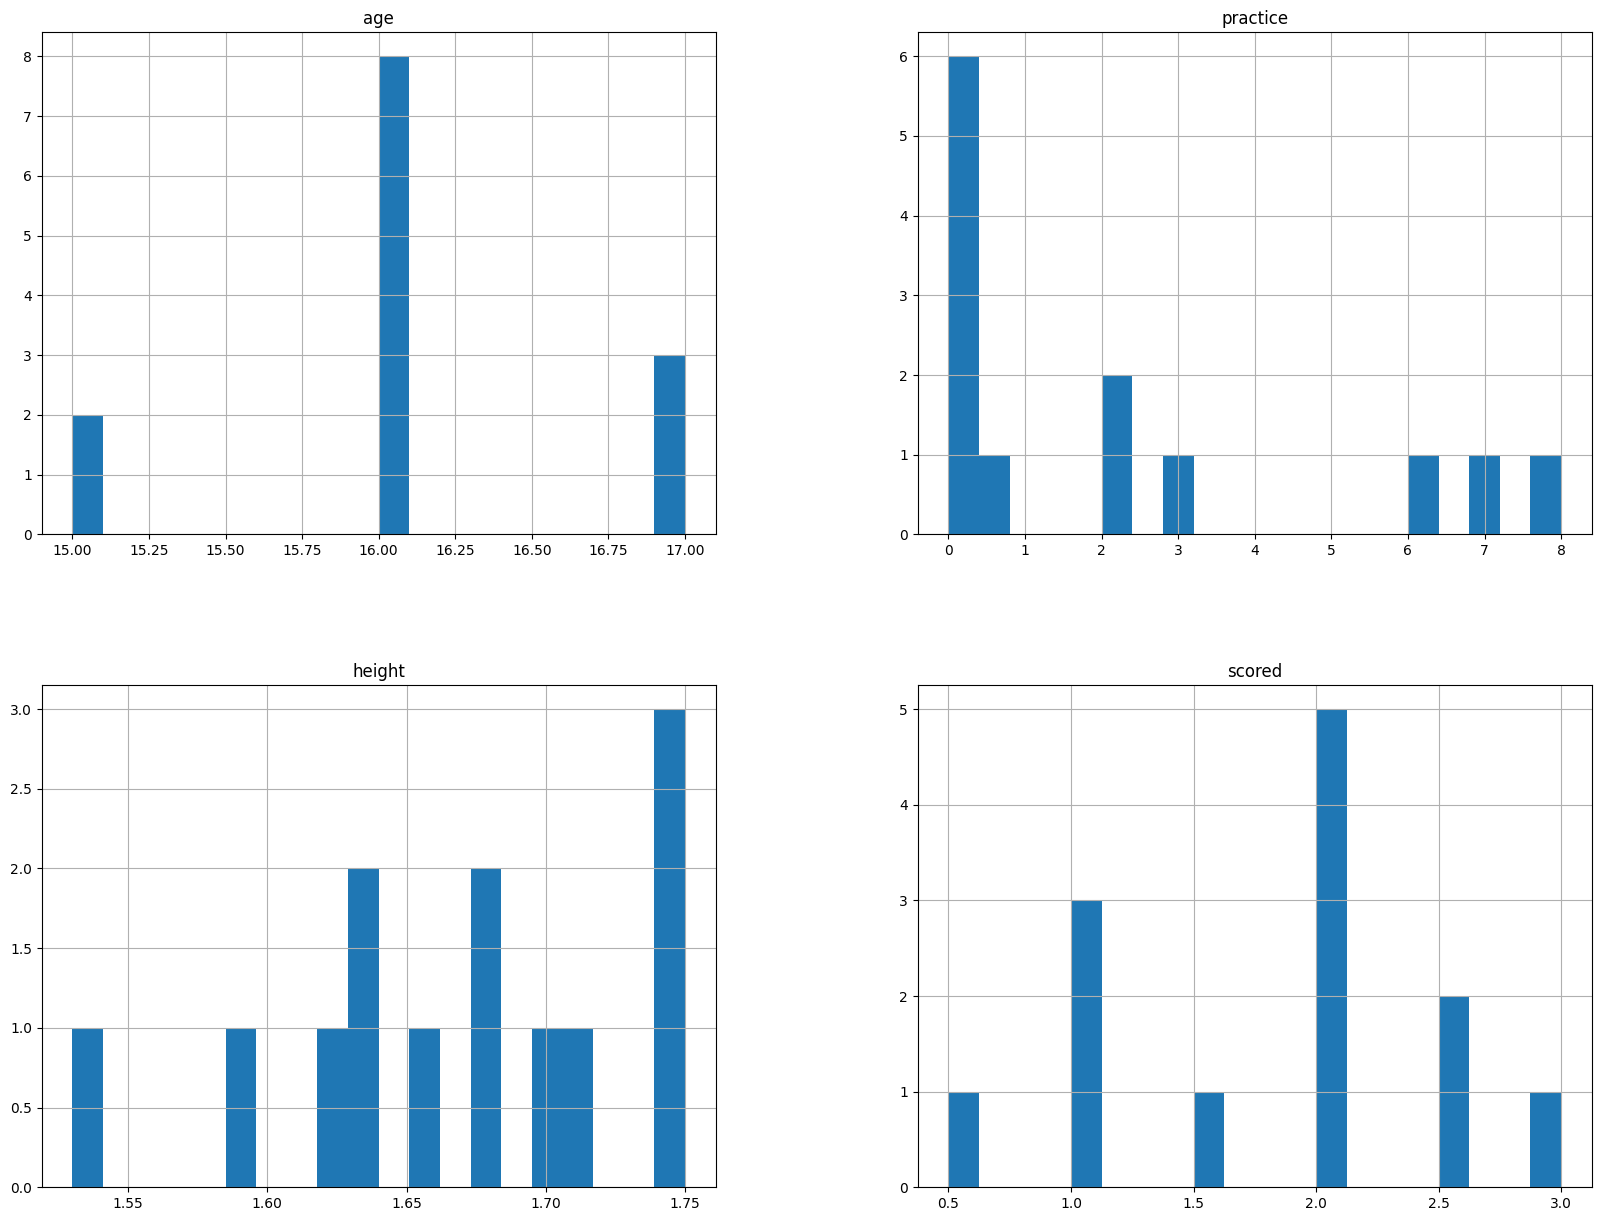

In [23]:
# %matplotlib incline
import matplotlib.pyplot as plt
df.hist(bins = 20, figsize=(20,15))
plt.show()

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),annot = True, cmap='Wistia')
plt.show()

In [13]:
x = df[["age", "practice","height"]]

In [14]:
y = df[["scored"]]

In [ ]:
x.head()

In [16]:
import sklearn
#building training and test dataset

from posixpath import split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
#create linear regresion object
regr = linear_model.LinearRegression()

#train the model using the training set
regr.fit(x_train, y_train)

#make predictions using testing set
y_pred = regr.predict(x_test)

Final model and results

Conclusion


In [19]:
import numpy as np

In [20]:
test_rsme = (np.sqrt(mean_squared_error(y_test,y_pred)))

In [21]:
print(test_rsme)

0.4612027360207651


In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test,y_pred)
ax.plot([y_test.min(),y_test.max()],[y_test.min(), y_test.max()], 'k--',lw=4)
plt.show()

Our equation

In [25]:
import statsmodels.api as sm

In [27]:
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 scored   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              36.75
Date:                Wed, 26 Jul 2023   Prob (F-statistic):                    1.04e-05
Time:                        18:31:12   Log-Likelihood:                         -10.634
No. Observations:                  13   AIC:                                      27.27
Df Residuals:                      10   BIC:                                      28.96
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0805      0.211      0.381      0.711      -0.391       0.551
practice       0.1356      0.065      2.084      0.064      -0.009       0.280
height         0.1121      2.008      0.056      0.957      -4.363       4.587
==============================================================================
Omnibus:                        1.054   Durbin-Watson:                   2.828
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                0.350
Skew:                          -0.401   Prob(JB):                        0.840
Kurtosis:                       2.941   Cond. No.                         190.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""